In [115]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Przygotowanie danych

In [116]:
df = pd.read_csv('data/results.csv', usecols=['meters', 'price', 'rooms', 'district'], na_values=['Zapytajocenę', 'EMPTY'])

In [117]:
df.isnull().sum()

meters        0
price       158
rooms         1
district      0
dtype: int64

In [118]:
df = df.dropna()

In [119]:
df = df[df['meters'] < 80][df['price'] < 850000][df['rooms'] < 5]

/home/adsum/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [120]:
df = df[df['district'].isin(['LSM', 'Czuby', 'Bronowice', 'Felin', 'Wrotków', 'Węglinek', 'Śródmieście', 'Czechów'])]

In [121]:
df.describe()

,meters,price,rooms
count,1486.000000,1486.000000,1486.000000
mean,53.661561,325291.796803,2.580081
std,12.964916,84154.129988,0.776754
min,14.620000,64000.000000,1.000000
25%,45.750000,265933.500000,2.000000
50%,53.690000,329000.000000,3.000000
75%,62.860000,375455.000000,3.000000
max,79.950000,790000.000000,4.000000


In [122]:
df['price_m2'] = round(df['price'] / df['meters']).astype(int)

In [123]:
del df['price']

In [124]:
df['meters'] = round(df.meters).astype(int)
df['meters'].where(df['meters'] > 22, 22, inplace=True)
df['rooms'] = df.rooms.astype(int)

In [125]:
df.head()

,meters,rooms,district,price_m2
1,59,3,Czuby,5800
2,53,3,Czuby,6000
3,70,2,LSM,9986
5,58,2,LSM,5431
6,63,3,Czuby,6333


In [126]:
df['district'].value_counts()

Węglinek       290
Czuby          278
Wrotków        261
Śródmieście    179
Bronowice      166
Felin          146
LSM            113
Czechów         53
Name: district, dtype: int64

In [127]:
df.describe()

,meters,rooms,price_m2
count,1486.000000,1486.000000,1486.000000
mean,53.685061,2.580081,6137.897712
std,12.921274,0.776754,1058.993489
min,22.000000,1.000000,2133.000000
25%,46.000000,2.000000,5514.750000
50%,54.000000,3.000000,5900.000000
75%,63.000000,3.000000,6408.500000
max,80.000000,4.000000,12996.000000


In [128]:
corr_df = df.corr()
corr_df["price_m2"].sort_values(ascending=False)

price_m2    1.000000
rooms      -0.286705
meters     -0.295418
Name: price_m2, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3a05fad30>,
      dtype=object)

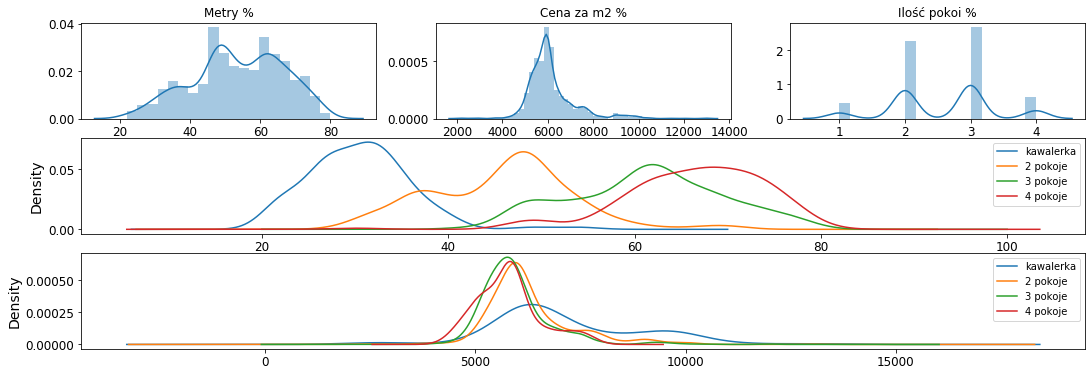

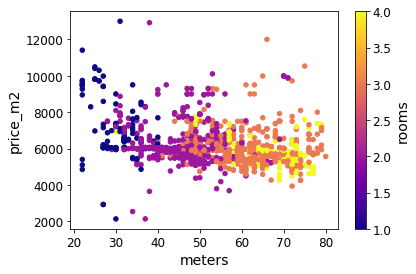

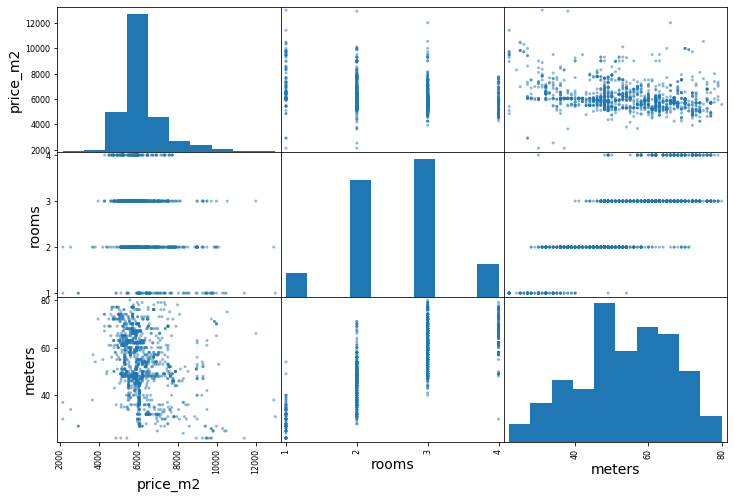

In [129]:
fig = plt.figure(figsize=(18, 6))
plt.subplot2grid((3, 3), (0, 0))
a1 = sns.distplot(df.meters)
plt.title("Metry %")

plt.subplot2grid((3, 3), (0, 1))
a1 = sns.distplot(df.price_m2)
plt.title('Cena za m2 %')

plt.subplot2grid((3, 3), (0, 2))
a1 = sns.distplot(df.rooms)
plt.title('Ilość pokoi %')

plt.subplot2grid((3, 3), (1, 0), colspan=3)
for x in [1, 2, 3, 4]:
    df.meters[df.rooms == x].plot(kind='kde')
plt.legend(('kawalerka', '2 pokoje', '3 pokoje', '4 pokoje'))

plt.subplot2grid((3, 3), (2, 0), colspan=3)
for x in [1, 2, 3, 4]:
    df.price_m2[df.rooms == x].plot(kind='kde')
plt.legend(('kawalerka', '2 pokoje', '3 pokoje', '4 pokoje'))

df.plot(kind="scatter", x="meters", y="price_m2", alpha=1,
       c="rooms", cmap=plt.get_cmap("plasma"), colorbar=True,  sharex=False)
from pandas.plotting import scatter_matrix

attributes = ["price_m2", "rooms", "meters"]
scatter_matrix(df[attributes], figsize=(12, 8))

# Zbiór testowy

In [130]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print("Uczące", len(train_set), ", testowe", len(test_set))

Uczące 1188 , testowe 298


### Atrybuty kategorii

In [131]:
# bins = [20, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 80]
# df['meters_cat'] = pd.cut(df['meters'], bins, labels=False)

In [132]:
# df['meters_cat'].hist(bins=50, figsize=(8, 4))

In [133]:
# from sklearn.model_selection import StratifiedShuffleSplit

# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(df, df["meters_cat"]):
#     strat_train_set = df.loc[train_index]
#     strat_test_set = df.loc[test_index]

In [134]:
# def income_cat_proportions(data):
#     return data["meters_cat"].value_counts() / len(data)

# train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# compare_props = pd.DataFrame({
#     "Łącznie": income_cat_proportions(df),
#     "L. warstwowe": income_cat_proportions(strat_test_set),
#     "Losowe": income_cat_proportions(test_set),
# }).sort_index()
# compare_props["Błąd - losowe (%)"] = 100 * compare_props["Losowe"] / compare_props["Łącznie"] - 100
# compare_props["Błąd - l. warstwowe (%)"] = 100 * compare_props["L. warstwowe"] / compare_props["Łącznie"] - 100

In [135]:
# compare_props

In [136]:
# for set_ in strat_train_set, strat_test_set:
#     set_.drop("meters_cat", axis=1, inplace=True)

# Przygotowanie danych pod algorytmy

In [137]:
#df = strat_train_set.drop("price_m2", axis=1)
#df_labels = strat_train_set["price_m2"].copy()
df = train_set.drop("price_m2", axis=1)
df_labels = train_set["price_m2"].copy()

In [138]:
df_num = df.select_dtypes(include=[np.number])
#df_num = df.drop(['district'], axis=1)

In [139]:
df_num

,meters,rooms
2326,62,3
2599,52,2
1792,63,3
779,77,4
1177,42,2
...,...,...
2133,49,2
2466,50,3
1603,38,2
2762,62,3


# Atrybuty kategorialne dla tekstu

In [140]:
from sklearn.preprocessing import OneHotEncoder

In [141]:
district_cat = df['district']

In [1]:
district_cat_encoded, district_categories = district_cat.factorize()
district_cat_encoded[:10]

NameError: name 'district_cat' is not defined

In [143]:
district_categories

Index(['Węglinek', 'Bronowice', 'Felin', 'Wrotków', 'Czuby', 'Śródmieście',
       'LSM', 'Czechów'],
      dtype='object')

In [150]:
encoder = OneHotEncoder(categories='auto')
district_cat_1hot = encoder.fit_transform(district_cat_encoded.reshape(-1,1))
district_cat_1hot

<1188x8 sparse matrix of type '<class 'numpy.float64'>'
	with 1188 stored elements in Compressed Sparse Row format>

In [151]:
district_cat_1hot.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [152]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

# num_pipeline = Pipeline([
#         ('std_scaler', StandardScaler()),
#     ])

# df_num_tr = num_pipeline.fit_transform(df_num)

In [153]:
# df_num_tr

In [154]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [155]:
num_attribs = list(df_num)
cat_attribs = ["district"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('encoder', CategoricalEncoder(encoding="onehot-dense"))
    ])

NameError: name 'CategoricalEncoder' is not defined

In [613]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [614]:
df_prepared = full_pipeline.fit_transform(df)
df_prepared

array([[ 0.53588634,  0.61301159,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.75545844, -0.17056682,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53588634,  0.76972728,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.75545844, -1.26757659,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53588634,  0.61301159,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.82723112,  1.08315864,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

In [615]:
df_prepared.shape

(1188, 10)

# Uczenie modelu

In [650]:
import pandas as pd
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [653]:
test_set

,meters,rooms,district,price_m2,meters_cat
2498,74,3,Wrotków,4999,25
1595,69,4,Wrotków,4272,23
834,55,3,Bronowice,5900,16
1041,63,3,Bronowice,5450,20
812,73,3,Śródmieście,5059,25
...,...,...,...,...,...
988,32,1,Węglinek,6050,4
2076,56,2,Czuby,6777,16
2653,63,3,Bronowice,5450,20
2785,68,3,Czuby,5279,22


In [651]:
X = df_prepared
Y = df_labels
test_data = test_set

In [660]:

dtc_tree_acc = 0
rfc_acc = 0
l_acc = 0
s_acc = 0
kNB_acc = 0

for i in range(100):
    
    # Drzewa decyzyjne

    dtc_clf = tree.DecisionTreeClassifier()
    dtc_clf = dtc_clf.fit(X,Y)
    dtc_prediction = dtc_clf.predict(test_data)
    #print(dtc_prediction)

    # Decyzyjny las losowy

    rfc_clf = RandomForestClassifier(n_estimators = 100)
    rfc_clf.fit(X,Y)
    rfc_prediction = rfc_clf.predict(test_data)
    #print(rfc_prediction)
    
    # Regresja logistyczna

    l_clf = LogisticRegression(solver = 'lbfgs')
    l_clf.fit(X,Y)
    l_prediction = l_clf.predict(test_data)
    #print(l_prediction)

    # SVC

    s_clf = SVC(gamma = 'scale')
    s_clf.fit(X,Y)
    s_prediction = s_clf.predict(test_data)
    #print(s_prediction)

    # k- najblizszych sasiadow

    kNB_clf = KNeighborsClassifier()
    kNB_clf.fit(X,Y)
    kNB_prediction = kNB_clf.predict(test_data)
    #print(kNB_prediction)

    # Dokładnosc

    dtc_tree_acc += accuracy_score(dtc_prediction,test_labels)
    rfc_acc += accuracy_score(rfc_prediction,test_labels)
    l_acc += accuracy_score(l_prediction,test_labels)
    s_acc += accuracy_score(s_prediction,test_labels)
    kNB_acc += accuracy_score(kNB_prediction,test_labels)

print('Drzewo decyzyjne', dtc_tree_acc, 'Decyzyjny las losowy', rfc_acc, 'Regresja logistyczna', l_acc, 'SVC', s_acc,'Najbliżsi sąsiedzi', kNB_acc)

klasyfikatory = ['Drzewo decyzyjne', 'Decyzyjny las losowy', 'Regresja logistyczna' , 'SVC','Najbliżsi sąsiedzi']
dokładnosc = np.array([dtc_tree_acc, rfc_acc, l_acc, s_acc, kNB_acc])
max_acc = np.argmax(dokładnosc)
print('\n' + klasyfikatory[max_acc] + ' jest najlepszym klasyfikatorem problemu.\n')

ValueError: could not convert string to float: 'Wrotków'

### Predict Logistic Regresion

In [645]:
from sklearn import linear_model, preprocessing

In [646]:
classifier = linear_model.LogisticRegression(solver = 'lbfgs')
classifier_ = classifier.fit(df_prepared, df_labels)
classifier_.score(df_prepared, df_labels)

/home/adsum/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.2474747474747475

In [647]:
train_set

,meters,rooms,district,price_m2,meters_cat
2326,62,3,Węglinek,6100,19
2599,52,2,Bronowice,5534,14
1792,63,3,Bronowice,5450,20
779,77,4,Felin,4900,27
1177,42,2,Węglinek,6050,9
...,...,...,...,...,...
2133,49,2,Wrotków,5850,13
2466,50,3,Czuby,6200,13
1603,38,2,Bronowice,5451,7
2762,62,3,Wrotków,5199,19


In [616]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [617]:
# Przetestujmy pełen potok na kilku próbkach uczących
some_data = df.iloc[:5]
some_labels = df_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Prognozy:", lin_reg.predict(some_data_prepared))

Prognozy: [5858.85350869 5614.59231979 5305.36175425 4773.63263535 6302.68422466]


### Porównanie wyników z rzeczywistymi wartościami

In [618]:
print("Etykiety:", list(some_labels))

Etykiety: [6100, 5534, 5450, 4900, 6050]


In [619]:
some_data_prepared

array([[ 0.53588634,  0.61301159,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [-0.75545844, -0.17056682,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.53588634,  0.76972728,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.82723112,  1.86673705,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.75545844, -0.95414522,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ]])

In [620]:
from sklearn.metrics import mean_squared_error

df_predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

816.6670330771776

In [621]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(df_labels, df_predictions)
lin_mae

528.8037559845967

In [622]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(df_prepared, df_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [623]:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=1e-07, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [624]:
df_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

535.2216726432573

In [625]:
tre_mae = mean_absolute_error(df_labels, df_predictions)
tre_mae

292.0745790154379

# Regulowanie modelu

### Sprawdzian krzyżowy

In [626]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [627]:
def display_scores(scores):
    print("Wyniki:", scores)
    print("Średnia:", scores.mean())
    print("Odchylenie standardowe:", scores.std())

display_scores(tree_rmse_scores)

Wyniki: [792.21710805 863.59786457 899.27228467 882.3196115  745.2549645
 769.70014759 853.53767174 663.85654891 840.73974857 700.45481121]
Średnia: 801.09507613053
Odchylenie standardowe: 75.9013623541567


In [628]:
lin_scores = cross_val_score(lin_reg, df_prepared, df_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Wyniki: [819.97074658 925.83355698 862.974221   948.46360455 766.11047133
 688.41302277 958.3255067  750.6336786  827.15654375 670.84747139]
Średnia: 821.8728823651466
Odchylenie standardowe: 97.96830418774282


In [629]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(df_prepared, df_labels)

/home/adsum/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [630]:
df_predictions = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_labels, df_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

561.2452128698436

In [631]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Wyniki: [767.06708924 868.42001729 908.07103816 853.81878118 611.49936938
 660.10565777 852.26017143 640.43632585 742.16491304 730.75107684]
Średnia: 763.4594440182545
Odchylenie standardowe: 99.20911276829105


In [632]:
scores = cross_val_score(lin_reg, df_prepared, df_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count     10.000000
mean     821.872882
std      103.267660
min      670.847471
25%      754.502877
50%      823.563645
75%      910.118723
max      958.325507
dtype: float64

In [633]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(df_prepared, df_labels)
df_predictions = svm_reg.predict(df_prepared)
svm_mse = mean_squared_error(df_labels, df_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

1026.1521886759972

### Metoda przeszukiwania siatki

In [634]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [5, 15, 25, 40, 60], 'max_features': [2, 3, 4, 6, 8, 9, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(df_prepared, df_labels)

/home/adsum/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 3, 4, 6, 8, 

In [635]:
grid_search.best_params_

{'max_features': 10, 'n_estimators': 40}

In [636]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [637]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

790.2859752564018 {'max_features': 2, 'n_estimators': 5}
781.580634916767 {'max_features': 2, 'n_estimators': 15}
774.6519008634831 {'max_features': 2, 'n_estimators': 25}
768.0045545131183 {'max_features': 2, 'n_estimators': 40}
767.8697764479059 {'max_features': 2, 'n_estimators': 60}
777.3320306031045 {'max_features': 3, 'n_estimators': 5}
773.7339598316009 {'max_features': 3, 'n_estimators': 15}
768.3736700532968 {'max_features': 3, 'n_estimators': 25}
763.5412690019813 {'max_features': 3, 'n_estimators': 40}
764.0051368484952 {'max_features': 3, 'n_estimators': 60}
777.8263549688895 {'max_features': 4, 'n_estimators': 5}
773.4902132742953 {'max_features': 4, 'n_estimators': 15}
768.2701765882098 {'max_features': 4, 'n_estimators': 25}
763.5284189543756 {'max_features': 4, 'n_estimators': 40}
764.2962800678242 {'max_features': 4, 'n_estimators': 60}
786.3854621790972 {'max_features': 6, 'n_estimators': 5}
773.2070596982181 {'max_features': 6, 'n_estimators': 15}
768.663068979438 {'

In [638]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022176,0.000429,0.002853,0.000162,2,5,NaN,"{'max_features': 2, 'n_estimators': 5}",-644238.649759,-754625.778950,...,-624551.922687,77155.177391,40,-303920.508366,-289323.122488,-326603.816261,-289255.649147,-316356.901151,-305091.999483,14768.047507
1,0.058844,0.003463,0.005021,0.000411,2,15,NaN,"{'max_features': 2, 'n_estimators': 15}",-632807.649131,-805384.311598,...,-610868.288877,115511.486475,34,-288087.366805,-282338.712821,-320230.372435,-294543.660941,-318300.665431,-300700.155686,15654.614429
2,0.094936,0.002341,0.007070,0.000668,2,25,NaN,"{'max_features': 2, 'n_estimators': 25}",-627133.797238,-801112.952090,...,-600085.567511,121143.219523,25,-286262.846273,-278773.093500,-311272.221166,-285791.833003,-307533.956278,-293926.790044,12965.855412
3,0.164011,0.012613,0.010134,0.000554,2,40,NaN,"{'max_features': 2, 'n_estimators': 40}",-625478.340703,-794058.528085,...,-589830.995753,124950.351729,14,-284921.963336,-275551.086980,-308318.862719,-280111.071181,-304724.360317,-290725.468907,13282.352573
4,0.231944,0.002308,0.013567,0.000366,2,60,NaN,"{'max_features': 2, 'n_estimators': 60}",-625784.587674,-801808.662362,...,-589623.993582,128083.764120,13,-283463.313355,-275335.358052,-306876.084759,-278423.352787,-301269.535382,-289073.528867,12643.667800
5,0.022951,0.000570,0.003033,0.000210,3,5,NaN,"{'max_features': 3, 'n_estimators': 5}",-634585.497780,-776928.046986,...,-604245.085802,110487.456020,28,-300494.138401,-291770.674452,-331691.436107,-293484.404285,-318162.160976,-307120.562844,15434.494465
6,0.062615,0.001721,0.005037,0.000335,3,15,NaN,"{'max_features': 3, 'n_estimators': 15}",-616942.421783,-797915.029723,...,-598664.240597,119047.218018,24,-286605.779540,-282918.124306,-318169.561708,-292890.377182,-316690.946444,-299454.957836,15026.494379
7,0.099716,0.002850,0.006831,0.000319,3,25,NaN,"{'max_features': 3, 'n_estimators': 25}",-619608.301279,-791942.466082,...,-590398.096831,121490.884297,16,-285450.319393,-279627.419711,-310600.905243,-284188.187376,-305931.993762,-293159.765097,12572.766809
8,0.155757,0.005027,0.009658,0.000729,3,40,NaN,"{'max_features': 3, 'n_estimators': 40}",-620271.071608,-783106.296189,...,-582995.269469,122413.060090,6,-284974.690244,-276105.523185,-307484.243714,-279748.883401,-303619.638506,-290386.595810,12758.069331
9,0.227997,0.005414,0.014152,0.002576,3,60,NaN,"{'max_features': 3, 'n_estimators': 60}",-623866.099501,-793628.490305,...,-583703.849131,127482.937839,8,-283104.324621,-275012.474796,-305966.310359,-277872.527266,-301185.429944,-288628.213397,12568.848497


In [639]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=10),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(df_prepared, df_labels)

/home/adsum/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [640]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

759.984662531142 {'max_features': 7, 'n_estimators': 180}
760.1665968475663 {'max_features': 8, 'n_estimators': 189}
761.8458517860392 {'max_features': 5, 'n_estimators': 103}
762.6516565181594 {'max_features': 3, 'n_estimators': 75}
760.2251730011956 {'max_features': 8, 'n_estimators': 117}
760.5403785355481 {'max_features': 4, 'n_estimators': 104}
759.2346927201088 {'max_features': 8, 'n_estimators': 131}
763.5523614304947 {'max_features': 6, 'n_estimators': 53}
764.3515655579583 {'max_features': 2, 'n_estimators': 88}
758.5565611264308 {'max_features': 6, 'n_estimators': 130}


In [641]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.09718315, 0.45021985, 0.02636175, 0.00768275, 0.02518375,
       0.05053167, 0.04793568, 0.01316687, 0.01062234, 0.27111218])

In [642]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("price_m2", axis=1)
y_test = test_set["price_m2"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [643]:
final_rmse

712.0830274419701